<a href="https://colab.research.google.com/github/toumidhia/oil_prive_analysing/blob/main/oil_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas matplotlib numpy

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_oil_price_data(ticker='CL=F', start_date='2018-01-01', end_date='2024-12-31'):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def analyze_oil_prices(data):
    data['SMA_50'] = data['Close'].rolling(window=30).mean()
    data['SMA_200'] = data['Close'].rolling(window=90).mean()

    data['Daily_Return'] = data['Close'].pct_change() * 100

    # Resample the data to weekly frequency and sum the daily returns within each week
    weekly_data = data['Daily_Return'].resample('W').sum()  # Sum of daily returns for each week

    plt.figure(figsize=(14, 7))

    # Plot Closing Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='WTI Crude Oil Price', color='blue', lw=1.5)
    plt.plot(data['SMA_50'], label='50-day Moving Average', color='red', lw=1.5)
    plt.title('WTI Crude Oil Price with 50-day Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

     # Plot Weekly Returns
    plt.subplot(2, 1, 2)
    plt.plot(weekly_data.index, weekly_data, label='Weekly Returns', color='purple', lw=1)
    plt.axhline(0, color='black', linewidth=1)
    plt.title('WTI Crude Oil Weekly Returns')
    plt.xlabel('Date (Weekly)')
    plt.ylabel('Weekly Return (%)')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

def print_statistics(data):
    print("Statistical Summary of Oil Price Data:")
    print(data.describe())

def show_max_min_price_per_year(data):
    # Resample the data by year and find the maximum and minimum closing price each year
    max_prices = data['Close'].resample('YE').max()
    min_prices = data['Close'].resample('YE').min()
    print("Maximum and Minimum WTI Crude Oil Prices for Each Year:")
    print("{:<10} {:<20} {:<20}".format("Year", "Max Price ($)", "Min Price ($)"))  # Table header
    print("-" * 50)  # Divider
    for year in max_prices:
        print("{:<10} {:<20} {:<20}".format(year, str(round(max_prices[year], 2)), str(round(min_prices[year], 2))))
    # Plot the maximum and minimum prices for each year
    plt.figure(figsize=(10, 6))
    max_prices.plot(kind='bar', color='green')
    plt.title('Maximum WTI Crude Oil Price Per Year')
    plt.xlabel('Year')
    plt.ylabel('Max Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    min_prices.plot(kind='bar', color='orange')
    plt.title('Minimum WTI Crude Oil Price Per Year')
    plt.xlabel('Year')
    plt.ylabel('Min Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [9]:
oil_data = get_oil_price_data(ticker='CL=F', start_date='2018-01-01', end_date='2026-01-01')

[*********************100%***********************]  1 of 1 completed


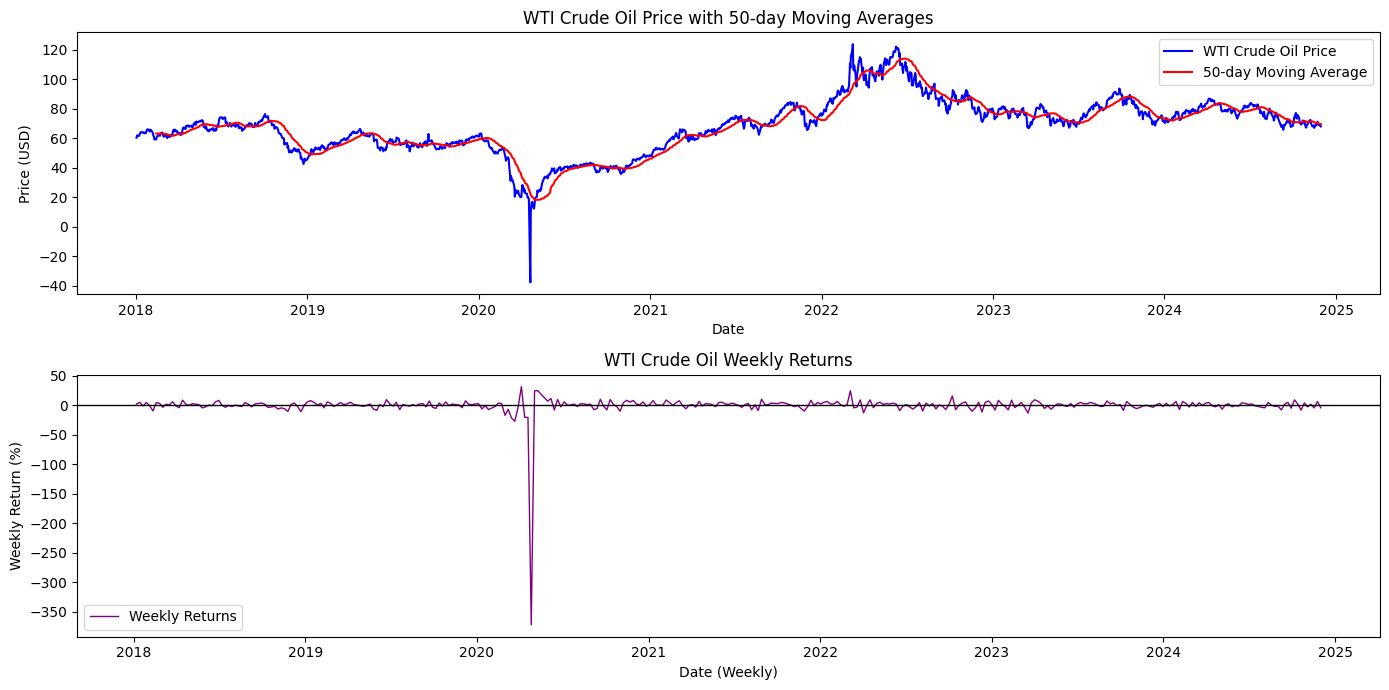

In [10]:
analyze_oil_prices(oil_data)

Maximum and Minimum WTI Crude Oil Prices for Each Year:
Year       Max Price ($)        Min Price ($)       
--------------------------------------------------
CL=F       Date
2018-12-31 00:00:00+00:00     76.41
2019-12-31 00:00:00+00:00     66.30
2020-12-31 00:00:00+00:00     63.27
2021-12-31 00:00:00+00:00     84.65
2022-12-31 00:00:00+00:00    123.70
2023-12-31 00:00:00+00:00     93.68
2024-12-31 00:00:00+00:00     86.91
Freq: YE-DEC, Name: CL=F, dtype: float64 Date
2018-12-31 00:00:00+00:00    42.53
2019-12-31 00:00:00+00:00    46.54
2020-12-31 00:00:00+00:00   -37.63
2021-12-31 00:00:00+00:00    47.62
2022-12-31 00:00:00+00:00    71.02
2023-12-31 00:00:00+00:00    66.74
2024-12-31 00:00:00+00:00    65.75
Freq: YE-DEC, Name: CL=F, dtype: float64


<Figure size 1000x600 with 0 Axes>

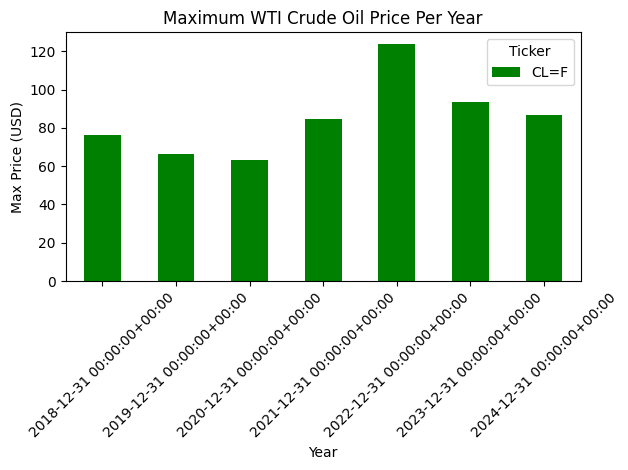

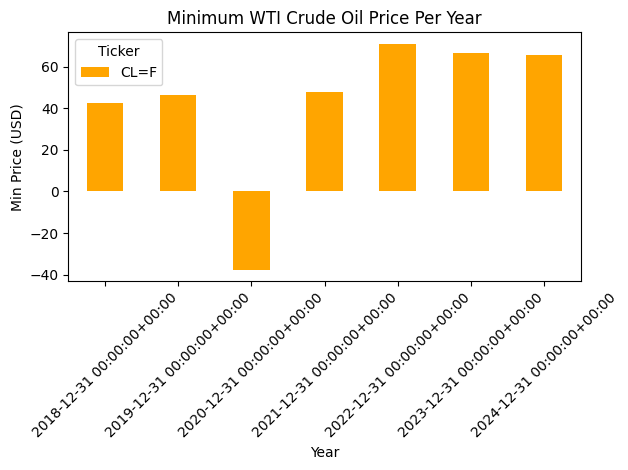

In [13]:
show_max_min_price_per_year(oil_data)